# 1. Import libraries


In [1]:
import pandas as pd  # For data manipulation
import numpy as np # for mathmatical opration
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical graphics
import warnings   # Suppress all warnings
warnings.filterwarnings('ignore')

# 2. Loading a CSV File in Pandas

In [2]:
df = pd.read_csv(r"D:\project data files\zomato.csv")

# 3. Checking the shape of the DataFrame

In [3]:
df.shape

(51717, 17)

In [4]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df.tail(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# 4. Checking null values

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

# 5. Heatmap to visualize the null values

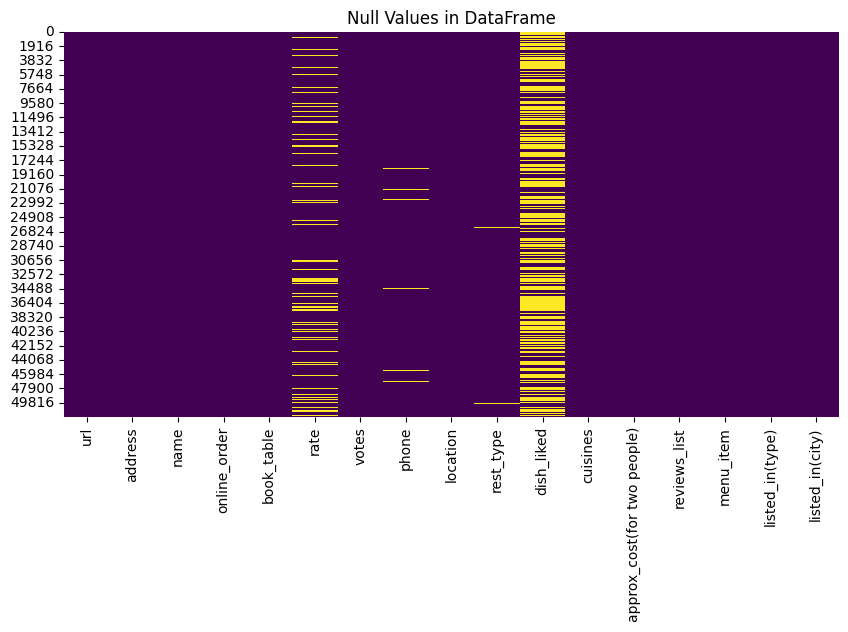

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.title('Null Values in DataFrame')
plt.show()

# 6. Drope null values and unwanted columns

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(23193, 17)

In [13]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [14]:
# Drope the column
df = df.drop(columns=['url', 'address','phone','menu_item'], axis=1 )

In [15]:
df.shape

(23193, 13)

In [16]:
df.describe()

,votes
count,23193.000000
mean,601.074462
std,1114.854301
min,0.000000
25%,101.000000
50%,221.000000
75%,586.000000
max,16832.000000


In [17]:
# Rename the column
df =  df.rename(columns={'approx_cost(for two people)':'two_people_cost'}) 

In [18]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [19]:
# repace the '/5' from rating
df['rate'] = df['rate'].str.replace('/5','')


In [20]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [21]:
df.dtypes

name               object
online_order       object
book_table         object
rate               object
votes               int64
location           object
rest_type          object
dish_liked         object
cuisines           object
two_people_cost    object
reviews_list       object
listed_in(type)    object
listed_in(city)    object
dtype: object

In [22]:
# change into numaric
df['rate'] = pd.to_numeric(df['rate'], errors='coerce') # change into numaric
df['two_people_cost'] = pd.to_numeric(df['two_people_cost'], errors='coerce')

In [23]:
 # stas values in dataframe
df.describe()


,rate,votes,two_people_cost
count,23046.000000,23193.000000,17187.000000
mean,3.904383,601.074462,510.088439
std,0.426365,1114.854301,198.169686
min,1.800000,0.000000,40.000000
25%,3.800000,101.000000,350.000000
50%,4.000000,221.000000,500.000000
75%,4.200000,586.000000,650.000000
max,4.900000,16832.000000,950.000000


# 7. Rating by the peoples

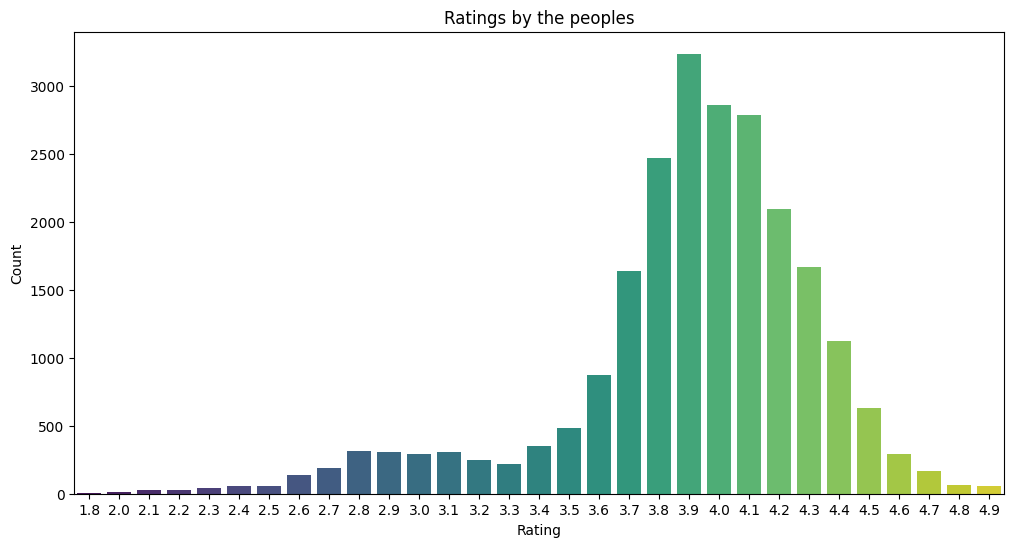

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rate', data=df,palette=('viridis'))
plt.title('Ratings by the peoples',)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

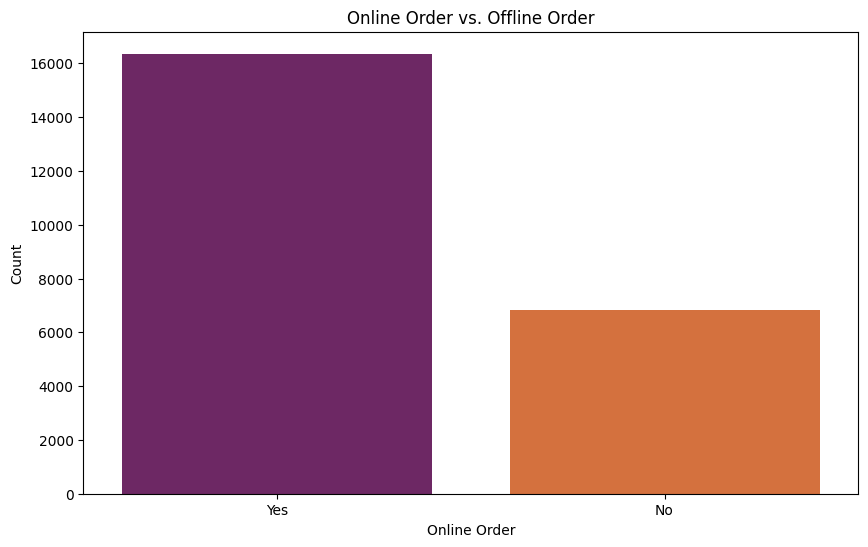

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='online_order', palette=('inferno'),  data=df)
plt.title('Online Order vs. Offline Order')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

In [26]:
# Top cuisines
top_cuisines = df['cuisines'].value_counts().head(10)
print(top_cuisines)

cuisines
North Indian                           1144
North Indian, Chinese                   777
South Indian                            359
Cafe                                    273
South Indian, North Indian, Chinese     233
Bakery, Desserts                        215
Desserts, Beverages                     214
Chinese                                 210
Ice Cream, Desserts                     208
Desserts                                206
Name: count, dtype: int64


# 8. Top 10 Cuisines

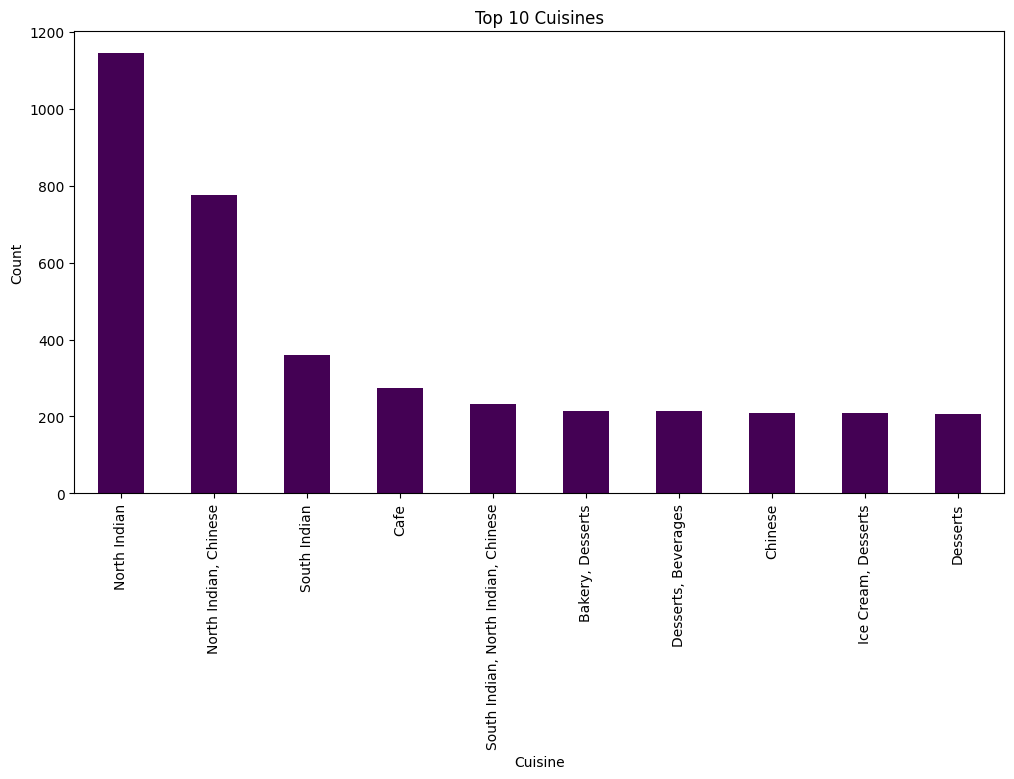

In [27]:
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar', cmap='viridis')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

In [28]:
# Famous restrarunt chain
famous_chains = df['name'].value_counts().head(10)
print(famous_chains)

name
Onesta                    85
Empire Restaurant         69
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Name: count, dtype: int64


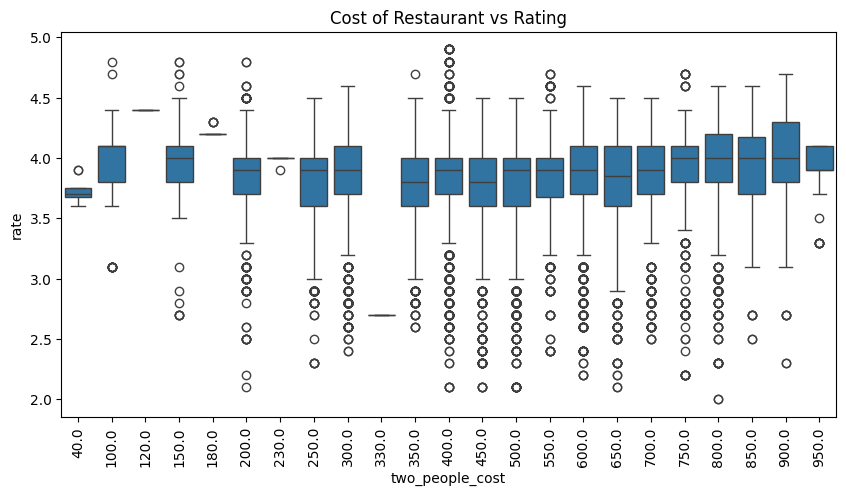

In [29]:
# Cost of Restaurant vs Rating
plt.figure(figsize=(10, 5))
sns.boxplot(x='two_people_cost', y='rate', data=df)
plt.title('Cost of Restaurant vs Rating')
plt.xticks(rotation=90)
plt.show()

# 9. Restaurants allowing table booking or not

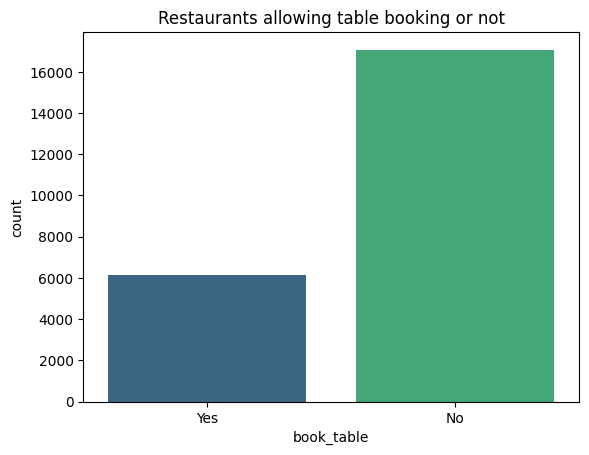

In [30]:
sns.countplot(x='book_table',   palette='viridis', data=df)
plt.title('Restaurants allowing table booking or not')
plt.show()

In [55]:
# rest type listed in
df.groupby('listed_in(type)').count()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,two_people_cost,reviews_list,listed_in(city)
listed_in(type),,,,,,,,,,,,
Buffet,762,762,762,753,762,762,762,762,762,178,762,762
Cafes,1047,1047,1047,1046,1047,1047,1047,1047,1047,906,1047,1047
Delivery,10625,10625,10625,10575,10625,10625,10625,10625,10625,9146,10625,10625
Desserts,1333,1333,1333,1330,1333,1333,1333,1333,1333,1254,1333,1333
Dine-out,8009,8009,8009,7954,8009,8009,8009,8009,8009,5646,8009,8009
Drinks & nightlife,890,890,890,871,890,890,890,890,890,25,890,890
Pubs and bars,527,527,527,517,527,527,527,527,527,32,527,527


# 10. Cafes	rest type and rating

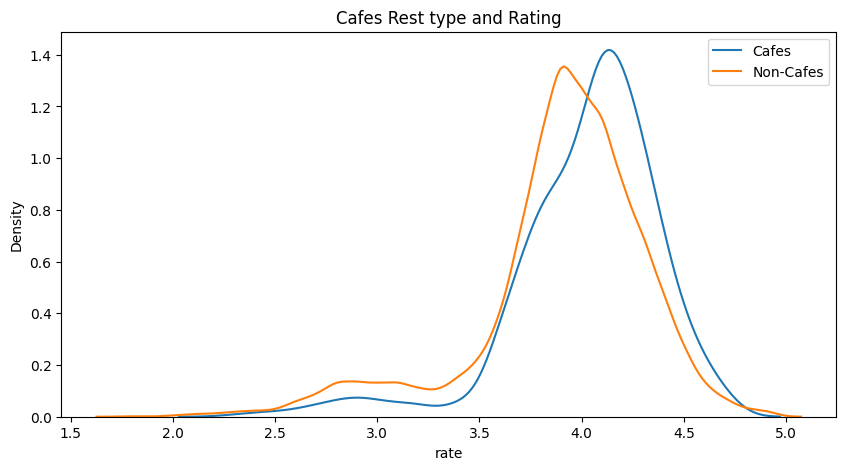

In [31]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['rate'][df['listed_in(type)'] == 'Cafes'], label='Cafes')
sns.kdeplot(df['rate'][df['listed_in(type)'] != 'Cafes'], label='non_cafe')
plt.title('Cafes Rest type and Rating')
plt.legend()
plt.show()

 # Inferences

 Online Orders and Table Booking:
       - Inference: Most restaurants allow online orders, but a smaller percentage may offer table booking.
       - Potential Problems: Explore factors influencing online orders and table bookings. Does offering these services correlate with higher ratings or more votes?

 Cost of Restaurant vs. Rating:
         - Inference: There may be a relationship between the cost for two people and the restaurant rating.
         - Potential Problems: Explore whether higher-priced restaurants tend to have higher ratings. Are customers willing to give higher ratings for more expensive dining experiences?


 Relation between Type and Rating:
         - Inference: Ratings may vary across different types of services.
         - Potential Problems: Analyze whether the type of service influences restaurant ratings. Do restaurants providing more services tend to have higher or lower ratings?

# Thanku